# 피프스-뉴톤 연결 

* 문제: 선수 A는 주사위를 6번 던져서 적어도 한번 눈이 6인 주사위가 한번 나온다고 주장한다. 선수 B는 주사위를 12번 던져서 적어도 한번 눈이 6인 주사위가 두번 나온다고 주장한다. 선수 C는 주사위를 18번 던져서 적어도 한번 눈이 6인 주사위가 세번 나온다고 주장한다. 선수 세명중 어떤 선수가 자신의 주장에 대해서 약속을 잘 지켜낼 수 있을까?

In [116]:
from scipy import stats 
import  math
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')
plt.rc('font',family = 'malgun gothic')

* 사건 A 를 6인 주사위가 n 번 나온 확률이라고 한다면 
    * P(A) = 1 - P(~A) 로 구할 수 있다.

* 해당 값들은 n 번 시행했을 때 주사위가 나올 확률이 1/6 인 사건이 s-1 번 나올 누적 확률 밀도 함수 값을 빼주면 된다
* 그 말은 즉, 6번 던졌을 때 6인 주사위가 1번 이상 나올 확률은 전체 사건에서 0번 나올 확률을 빼면 된다.
* 12번 던졌을 때 주사위가 2번 이상 나올 확률은 2번 미만 나올 확률을 빼주면 된다.
* 18번도 마찬가지로, 3번 미만 나올 확률을 빼주면 된다. 

Text(0.5, 1.1, '피프스 뉴턴 문제')

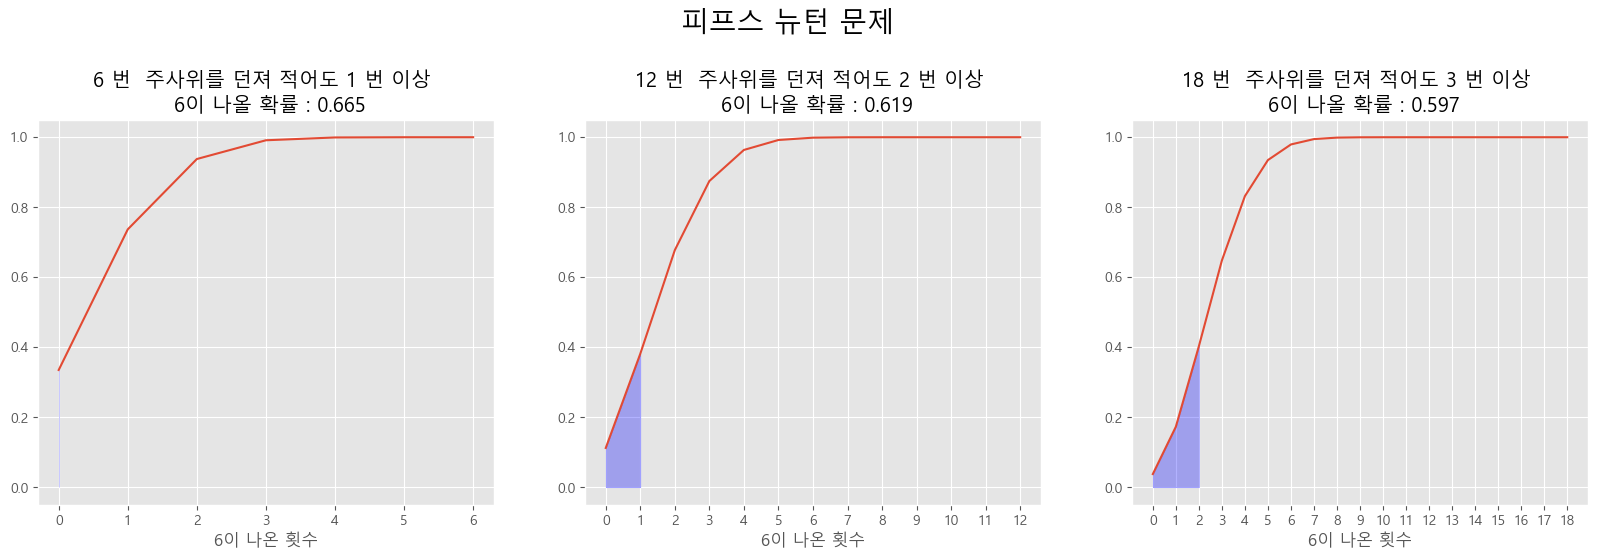

In [121]:
fig,ax = plt.subplots(ncols = 3, figsize = (20,5))

for s in range(1,4):
    
    n = s * 6 
    p = 1/6 
    
    binomial = stats.binom(n,p)
    
    prob = round(1 - binomial.cdf(s-1),3)
    
    ax[s-1].plot(binomial.cdf(range(n+1)))
    ax[s-1].set_xticks(range(0,n+1))
    ax[s-1].set_title(f'{n} 번  주사위를 던져 적어도 {s} 번 이상 \n 6이 나올 확률 : {prob}')
    
    ax[s-1].fill_between(range(n+1), binomial.cdf(range(n+1)),
                            where = (np.array(range(n+1)) <= s-1),
                            alpha = 0.3, color = 'blue')
    ax[s-1].set_xlabel('6이 나온 횟수')
    
fig.suptitle('피프스 뉴턴 문제', y = 1.1, fontsize = 20)